## 머신러닝 실습

### 와인품질 등급 회귀분석

#### 데이터 수집

##### UC 어바인 머신러닝 연구소 모듈 사용

In [1]:
## 필수 라이브러리 사용등록
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

In [2]:
## 와인 데이터 가져오기, 와인품질 id =186
winQuality = fetch_ucirepo(id=186)

In [4]:
dfWineQuality = winQuality.data.original

In [5]:
dfWineQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
dfWineQuality.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


##### 머신러닝 준비
- X, y값 생성

In [12]:
X = dfWineQuality.drop(['quality', 'color'], axis=1)

In [14]:
y = dfWineQuality['quality']

##### 분석모델 구축, 결과 분석

In [17]:
## 회귀분석용 모델, 함수 사용등록
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

In [46]:
# 훈련용 데이터와 검증(평가)용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=158)

In [52]:
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1325,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
4361,7.3,0.32,0.35,1.4,0.050,8.0,163.0,0.99244,3.24,0.42,10.7
3229,6.9,0.25,0.24,1.8,0.053,6.0,121.0,0.99300,3.23,0.70,11.4
4572,6.6,0.23,0.30,14.9,0.051,33.0,118.0,0.99835,3.04,0.54,9.0
804,8.4,0.52,0.22,2.7,0.084,4.0,18.0,0.99682,3.26,0.57,9.9
...,...,...,...,...,...,...,...,...,...,...,...
3842,6.7,0.23,0.42,11.2,0.047,52.0,171.0,0.99758,3.54,0.74,10.4
1892,6.2,0.28,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8
3082,6.9,0.25,0.24,3.6,0.057,13.0,85.0,0.99420,2.99,0.48,9.5
5695,8.0,0.25,0.35,1.1,0.054,13.0,136.0,0.99366,3.08,0.55,9.5


In [53]:
y_train

1325    6
4361    5
3229    5
4572    6
804     6
       ..
3842    5
1892    7
3082    4
5695    5
1442    5
Name: quality, Length: 4547, dtype: int64

In [54]:
## 선형회귀 모델 생성
model = LinearRegression()

In [55]:
# 선형회귀 모델 훈련
model.fit(X_train, y_train) # X는 독립변수 12, y는 종속변수(품질)

LinearRegression()

In [56]:
# 선형회귀 분석, 예측
# X_test를 매개변수로 실행했을 때 문제가 생기면 np.array()를 사용
y_predict = model.predict(X_test)

In [57]:
y_test

5001    6
2943    8
6341    6
4385    6
2519    7
       ..
2737    5
3190    6
1836    6
5958    6
3560    5
Name: quality, Length: 1950, dtype: int64

In [58]:
y_predict

array([5.52789705, 6.38661532, 5.90413574, ..., 5.35888348, 5.4572241 ,
       5.52930233])

In [59]:
## 분석평가지표별 수치
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f'MSE = {mse:.4f}')
print(f'RMSE = {rmse:.4f}')
print(f'R^2(VS) = {r2:.4f}')

MSE = 0.5544
RMSE = 0.7446
R^2(VS) = 0.2844


In [60]:
## Y절편값, 회귀계수 값
print(f'Y절편값={model.intercept_:.4f}')
print(f'독립변수별 회귀계수값 = {np.round(model.coef_, 1)}')

Y절편값=57.7467
독립변수별 회귀계수값 = [  0.1  -1.3  -0.1   0.   -0.7   0.   -0.  -56.8   0.4   0.8   0.3]


In [61]:
pd.Series(data=np.round(model.coef_, 2),index =X.columns)

fixed_acidity            0.08
volatile_acidity        -1.33
citric_acid             -0.09
residual_sugar           0.04
chlorides               -0.74
free_sulfur_dioxide      0.01
total_sulfur_dioxide    -0.00
density                -56.80
pH                       0.40
sulphates                0.75
alcohol                  0.26
dtype: float64

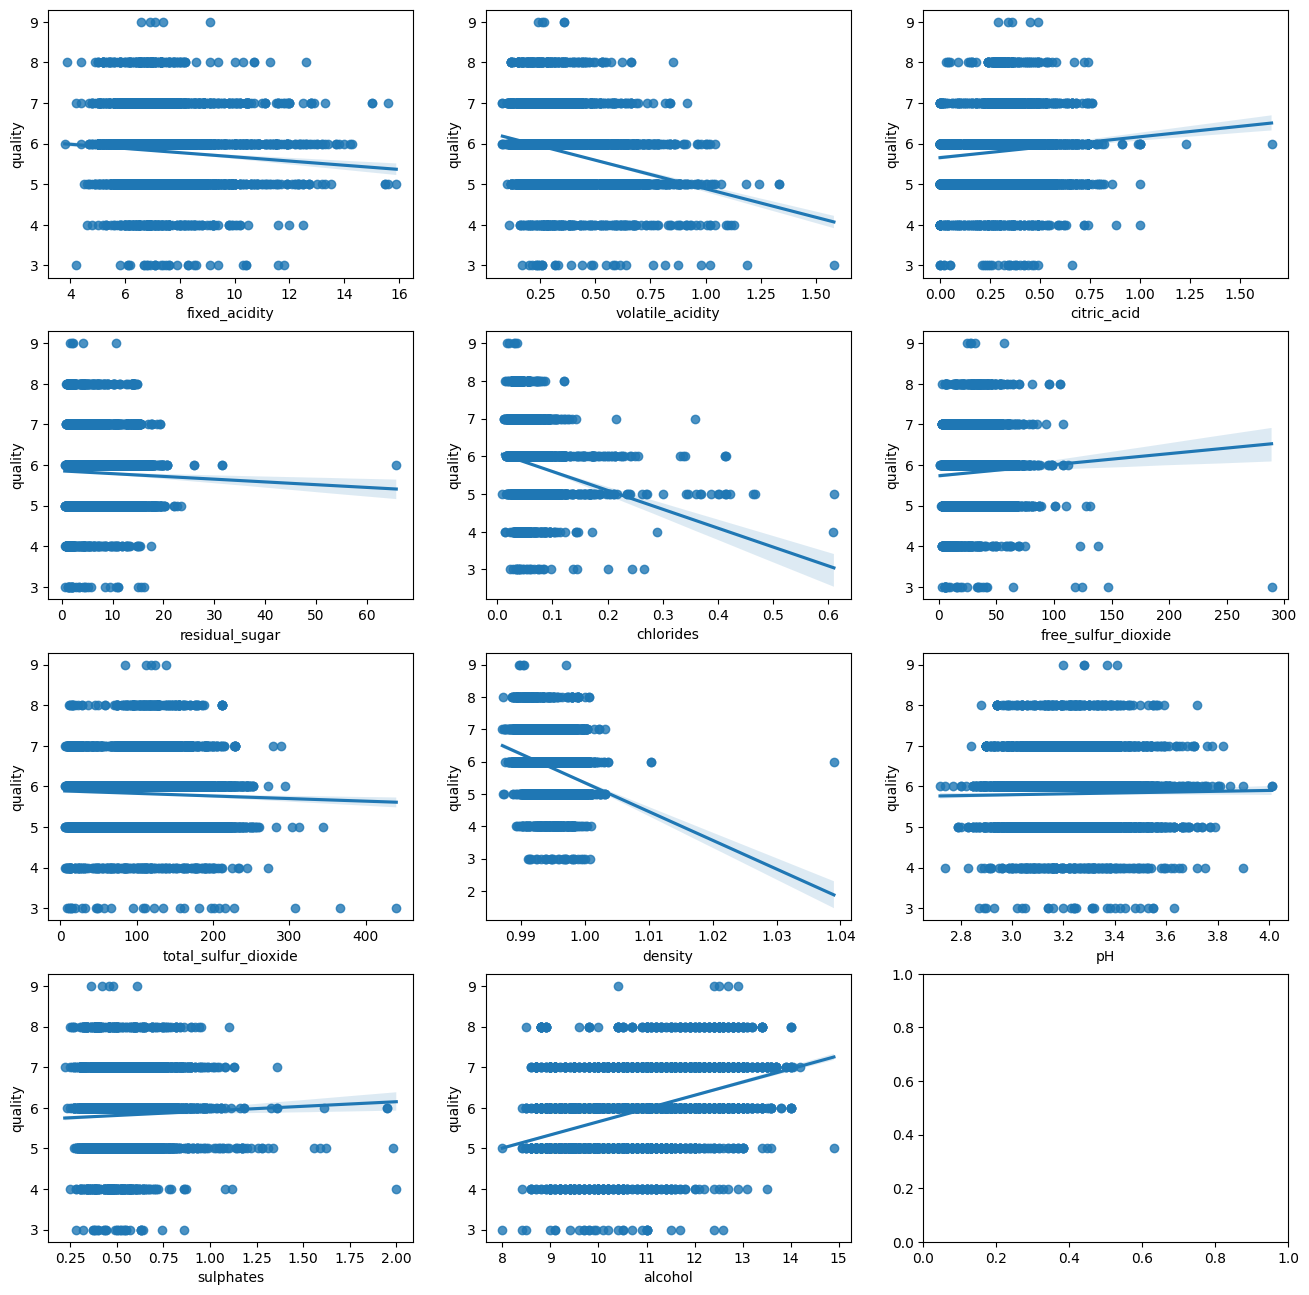

In [62]:
## 산점도
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=4)

x_features = list(X.columns)

for i, feat in enumerate(x_features):
    row = i // 3
    col = i % 3
    sns.regplot(data=dfWineQuality, x=feat, y='quality',ax=axs[row][col])

plt.show()

In [63]:
## 9등급 와인 추출
dfTemp = dfWineQuality[dfWineQuality['quality'] == 9]

In [64]:
## 9등급 와인 최종 테스트 값
dfWineTop = dfTemp.drop(['quality','color'], axis = 1)

In [65]:
predicts = model.predict(dfWineTop)

In [66]:
predicts

array([6.02046181, 6.55796422, 6.48233787, 6.62451819, 6.63125784])

##### 결론
- 머신러닝으로 학습을 해도 9등급 와인에 대해서 제대로 예측을 못함